# Density evolution
We want to see how isopycnal layer volumes change in MOM6-panan experiments.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-oqzion0k', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-0jan1ely', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-mmz8iltb', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-ds9kwn72', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-tb3is2nq', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/x77/amh157/mom6-panan-diagnostics/dask-worker-space/worker-46miflbx', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 48,Total memory: 188.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43943,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 48
Started: Just now,Total memory: 188.57 GiB
Comm: tcp://127.0.0.1:43791,Total threads: 6
Dashboard: /proxy/41327/status,Memory: 23.57 GiB
Nanny: tcp://127.0.0.1:37371,


In [38]:
hmo_hycom1 = cc.querying.getvar('panant-hycom1', 'hmo', session, 
                           chunks={'xh':120})
hmo_hycom1.isel(time=slice(46,58))

,Array,Chunk
Bytes,38.08 GiB,54.15 MiB
Shape,"(12, 70, 1690, 7200)","(1, 70, 1690, 120)"
Count,7738 Tasks,720 Chunks
Type,float32,numpy.ndarray


In [39]:
hmo_hycom1_zonal_mean = hmo_hycom1.mean('xh')
hmo_hycom1_zonal_year1 = hmo_hycom1_zonal_mean.isel(time=slice(0,12)).mean('time').cumsum('rho2_l').load()
hmo_hycom1_zonal_lastyear = hmo_hycom1_zonal_mean.isel(time=slice(46,58)).mean('time').cumsum('rho2_l').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

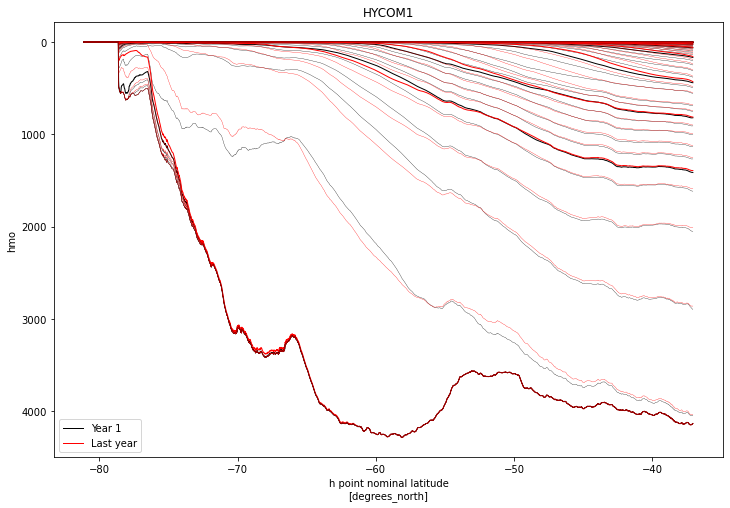

In [47]:
plt.figure(figsize=(12,8))
for i in range(70):
    if np.mod(i,5)==0:
        l1 = hmo_hycom1_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=1.0)
        l2 = hmo_hycom1_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=1.0)
    else:
        hmo_hycom1_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=0.3)
        hmo_hycom1_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=0.3)
plt.gca().invert_yaxis()
plt.title('HYCOM1')
plt.legend(['Year 1','Last year'])

In [32]:
hmo_v2 = cc.querying.getvar('panant-v2', 'hmo', session, 
                           chunks={'xh':120})

In [33]:
hmo_v2_zonal_mean = hmo_v2.mean('xh')
hmo_v2_zonal_year1 = hmo_v2_zonal_mean.isel(time=slice(0,12)).mean('time').cumsum('rho2_l').load()
hmo_v2_zonal_lastyear = hmo_v2_zonal_mean.isel(time=slice(46,58)).mean('time').cumsum('rho2_l').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

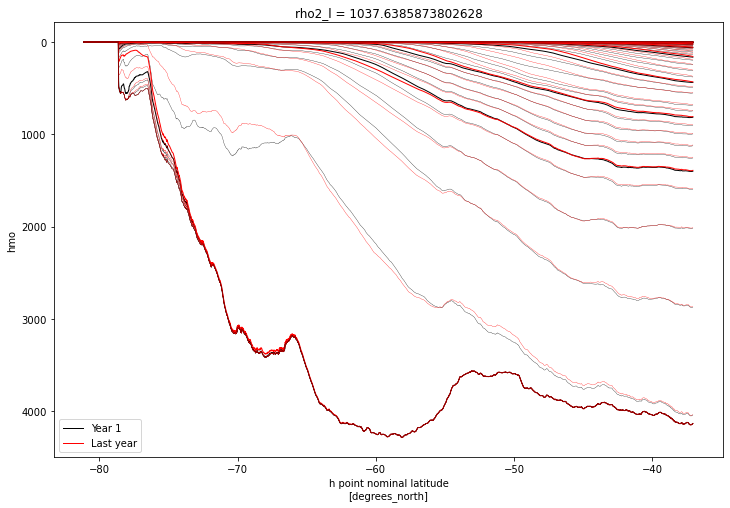

In [46]:
plt.figure(figsize=(12,8))
for i in range(70):
    if np.mod(i,5)==0:
        hmo_v2_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=1.0)
        hmo_v2_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=1.0)
    else:
        hmo_v2_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=0.3)
        hmo_v2_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=0.3)
plt.gca().invert_yaxis()
plt.legend('z*')
plt.legend(['Year 1','Last year'])

In [ ]:
hmo_v2_zonal_verylastyear = hmo_v2_zonal_mean.isel(time=slice(84,96)).mean('time').cumsum('rho2_l').load()

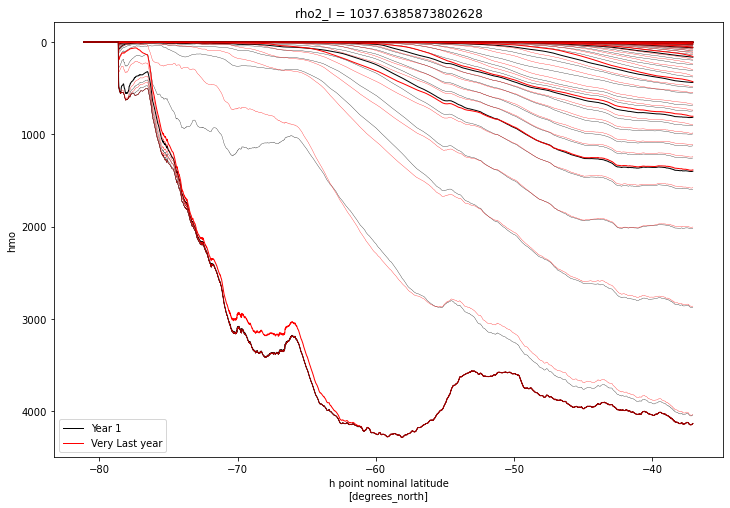

In [50]:
plt.figure(figsize=(12,8))
for i in range(70):
    if np.mod(i,5)==0:
        hmo_v2_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=1.0)
        hmo_v2_zonal_verylastyear.isel(rho2_l=i).plot(color='r',linewidth=1.0)
    else:
        hmo_v2_zonal_year1.isel(rho2_l=i).plot(color='k',linewidth=0.3)
        hmo_v2_zonal_verylastyear.isel(rho2_l=i).plot(color='r',linewidth=0.3)
plt.gca().invert_yaxis()
plt.legend('z*')
plt.legend(['Year 1','Very Last year'])

Text(0.5, 1.0, 'Last Year')

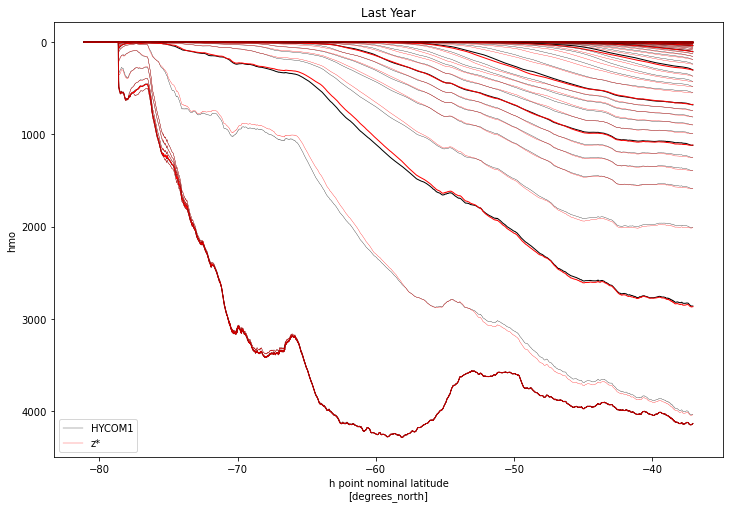

In [49]:
plt.figure(figsize=(12,8))
for i in range(70):
    if np.mod(i,5)==3:
        hmo_hycom1_zonal_lastyear.isel(rho2_l=i).plot(color='k',linewidth=1.0)
        hmo_v2_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=1.0)
    else:
        hmo_hycom1_zonal_lastyear.isel(rho2_l=i).plot(color='k',linewidth=0.3)
        hmo_v2_zonal_lastyear.isel(rho2_l=i).plot(color='r',linewidth=0.3)
plt.gca().invert_yaxis()
plt.legend(['HYCOM1','z*'])
plt.title('Last Year')

In [5]:
layer_vol_hycom1 = (areacello*hmo).sum(dim ={'xh','yh'}).load()

(1035.0, 1037.5)

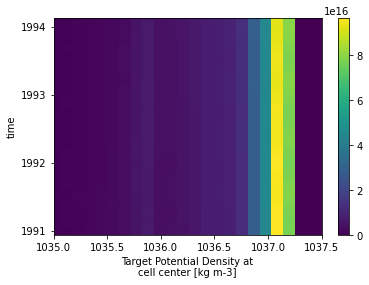

In [6]:
layer_vol_hycom1.plot()
plt.xlim([1035,1037.5])

(1035.0, 1037.5)

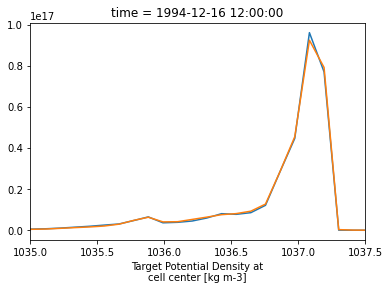

In [7]:
layer_vol_hycom1.isel(time=0).plot()
layer_vol_hycom1.isel(time=-1).plot()
plt.xlim([1035,1037.5])

In [16]:
volcello = cc.querying.getvar('panant-hycom1', 'volcello', session, 
                              chunks={'xh':120},attrs={'cell_methods':'area:sum rho2_l:sum yh:sum xh:sum time: mean'},
                              decode_times=False)

In [21]:
vol_sum = volcello.sum(dim={'xh','yh'}).load()

(1035.0, 1037.5)

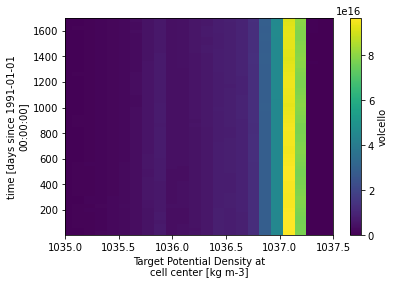

In [22]:
vol_sum.plot()
plt.xlim([1035,1037.5])

(1035.0, 1037.5)

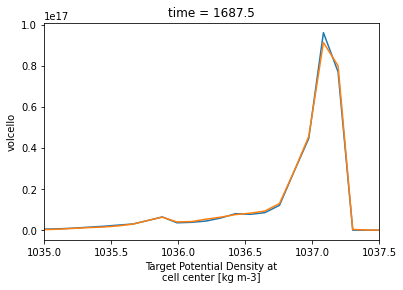

In [23]:
vol_sum.isel(time=0).plot()
vol_sum.isel(time=-1).plot()
plt.xlim([1035,1037.5])

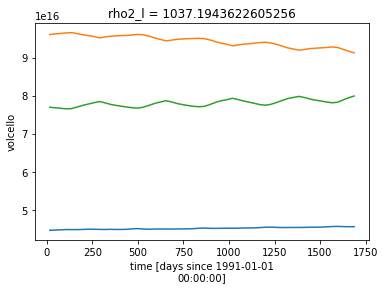

In [27]:
vol_sum.sel(rho2_l=1037.0,method='nearest').plot()
vol_sum.sel(rho2_l=1037.1,method='nearest').plot()
vol_sum.sel(rho2_l=1037.2,method='nearest').plot()


In [28]:
volcello_v2 = cc.querying.getvar('panant-v2', 'volcello', session, 
                              chunks={'xh':120},attrs={'cell_methods':'area:sum rho2_l:sum yh:sum xh:sum time: mean'},
                              decode_times=False)
vol_sum_v2= volcello_v2.sum(dim={'xh','yh'}).load()

(1035.0, 1037.5)

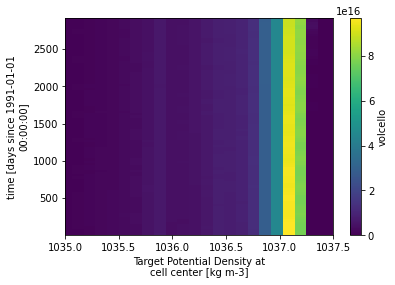

In [29]:
vol_sum_v2.plot()
plt.xlim([1035,1037.5])

(1035.0, 1037.5)

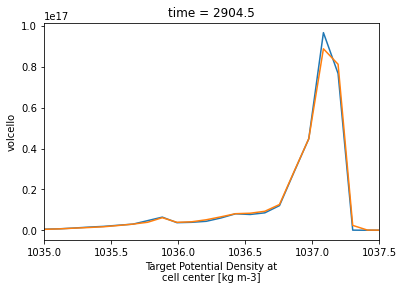

In [30]:
vol_sum_v2.isel(time=0).plot()
vol_sum_v2.isel(time=-1).plot()
plt.xlim([1035,1037.5])

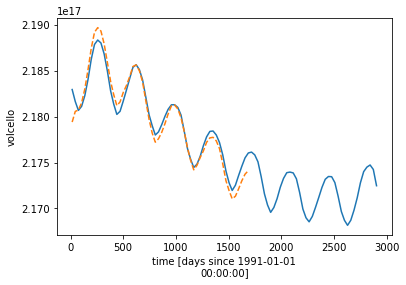

In [36]:
(vol_sum_v2.sel(rho2_l=1037.0,method='nearest')+vol_sum_v2.sel(rho2_l=1037.1,method='nearest')+vol_sum_v2.sel(rho2_l=1037.2,method='nearest')+vol_sum_v2.sel(rho2_l=1037.3,method='nearest')).plot()

(vol_sum.sel(rho2_l=1037.0,method='nearest')+vol_sum.sel(rho2_l=1037.1,method='nearest')+vol_sum.sel(rho2_l=1037.2,method='nearest')+vol_sum.sel(rho2_l=1037.3,method='nearest')).plot(linestyle='--')

In [35]:
vol_sum.rho2_l

<xarray.DataArray 'rho2_l' (rho2_l: 70)>
array([1013.75    , 1028.354478, 1028.811873, 1029.016151, 1029.217309,
       1029.415349, 1029.61027 , 1029.802072, 1029.990755, 1030.17632 ,
       1030.358766, 1030.538093, 1030.714302, 1030.887391, 1031.057362,
       1031.224215, 1031.387948, 1031.548563, 1031.706059, 1031.860437,
       1032.011695, 1032.159835, 1032.304856, 1032.446759, 1032.585542,
       1032.721207, 1032.853754, 1032.983181, 1033.10949 , 1033.23268 ,
       1033.352751, 1033.469704, 1033.583538, 1033.694362, 1033.803737,
       1033.913112, 1034.022487, 1034.131862, 1034.241237, 1034.350612,
       1034.459987, 1034.569362, 1034.678737, 1034.788112, 1034.897487,
       1035.006862, 1035.116237, 1035.225612, 1035.334987, 1035.444362,
       1035.553737, 1035.663112, 1035.772487, 1035.881862, 1035.991237,
       1036.100612, 1036.209987, 1036.319362, 1036.428737, 1036.538112,
       1036.647487, 1036.756862, 1036.866237, 1036.975612, 1037.084987,
       1037.194362, 1037.303737, 1037.413112, 1037.522487, 1037.638587])
Coordinates:
  * rho2_l   (rho2_l) float64 1.014e+03 1.028e+03 ... 1.038e+03 1.038e+03
Attributes:
    units:      kg m-3
    long_name:  Target Potential Density at cell center
    axis:       Z
    positive:   down
    edges:      rho2_i